In [25]:
import torch 
import cv2 
from ultralytics import YOLO
import os
import numpy as np
from PIL import Image
from IPython.display import Image as DisplayImage

In [3]:
model = YOLO("yolov8n.pt")

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using Device: {device}")

Using Device: cpu


/home/mohsin/School/Fall2024/Deployment/Final_Project/yolo_env/lib/python3.12/site-packages/torch/cuda/__init__.py:129: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


In [5]:
# train the model
model.train(
    data='/home/mohsin/School/Fall2024/Deployment/Final_Project/data/data.yaml',  # Path to data.yaml
    epochs=50,                # epochs
    batch=16,                 
    imgsz=416,                # Image size
    device=device              # using GPU for training
)

New https://pypi.org/project/ultralytics/8.3.49 available 😃 Update with 'pip install -U ultralytics'
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/home/mohsin/School/Fall2024/Deployment/Final_Project/data/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, 

E0000 00:00:1733938311.246177   49278 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733938311.258698   49278 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Overriding model.yaml nc=80 with nc=21

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /home/mohsin/School/Fall2024/Deployment/Final_Project/data/train/labels.cache... 1376 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1376/1376 [00:00<?, ?it/s]
/home/mohsin/School/Fall2024/Deployment/Final_Project/yolo_env/lib/python3.12/site-packages/torch/cuda/__init__.py:716: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
val: Scanning /home/mohsin/School/Fall2024/Deployment/Final_Project/data/valid/labels.cache... 488 images, 0 backgrounds, 0 corrupt: 100%|██████████| 488/488 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.0004, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 0 dataloader workers
Logging results to runs/detect/train3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.023      3.903      1.162         37        416: 100%|██████████| 86/86 [00:32<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.27it/s]

                   all        488        529     0.0938       0.68      0.142      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G     0.9971      2.835      1.144         23        416: 100%|██████████| 86/86 [00:30<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.30it/s]

                   all        488        529      0.246      0.498      0.346      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G     0.9793      2.264      1.149         32        416: 100%|██████████| 86/86 [00:30<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.50it/s]

                   all        488        529      0.488      0.529      0.523      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G     0.9353      1.906      1.127         38        416: 100%|██████████| 86/86 [00:31<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.54it/s]

                   all        488        529      0.629       0.74      0.711       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G     0.9115      1.694      1.111         37        416: 100%|██████████| 86/86 [00:29<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.54it/s]

                   all        488        529      0.687      0.772      0.762      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      0.894      1.594      1.106         35        416: 100%|██████████| 86/86 [00:30<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.41it/s]

                   all        488        529      0.783      0.692      0.798      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      0.868      1.435      1.075         32        416: 100%|██████████| 86/86 [00:31<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.72it/s]

                   all        488        529      0.756      0.781      0.813      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G     0.8508      1.319      1.072         25        416: 100%|██████████| 86/86 [00:31<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.63it/s]

                   all        488        529      0.758      0.842      0.877      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G     0.8379      1.287      1.077         38        416: 100%|██████████| 86/86 [00:31<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.51it/s]

                   all        488        529      0.856      0.818       0.89      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      0.819      1.194      1.051         35        416: 100%|██████████| 86/86 [00:31<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.42it/s]

                   all        488        529      0.875      0.819      0.885      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G     0.8181      1.148       1.05         37        416: 100%|██████████| 86/86 [00:31<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.50it/s]

                   all        488        529      0.867      0.834      0.891      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G      0.814      1.098      1.066         32        416: 100%|██████████| 86/86 [00:30<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.59it/s]

                   all        488        529      0.848      0.849        0.9      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G     0.7866      1.061      1.055         33        416: 100%|██████████| 86/86 [00:30<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.41it/s]

                   all        488        529      0.884      0.864      0.926      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G     0.7757      1.021      1.038         42        416: 100%|██████████| 86/86 [00:31<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.56it/s]

                   all        488        529      0.845      0.888      0.916      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G       0.77     0.9968      1.043         30        416: 100%|██████████| 86/86 [00:31<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.53it/s]

                   all        488        529       0.92      0.858      0.939      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G      0.779      1.001      1.051         29        416: 100%|██████████| 86/86 [00:31<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.41it/s]

                   all        488        529       0.89      0.888      0.937      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G     0.7789      0.952      1.044         34        416: 100%|██████████| 86/86 [00:31<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.57it/s]

                   all        488        529      0.907      0.873      0.939      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G      0.758     0.9334      1.033         22        416: 100%|██████████| 86/86 [00:31<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.53it/s]

                   all        488        529       0.91      0.877      0.936      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G     0.7669     0.9056      1.033         29        416: 100%|██████████| 86/86 [00:31<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.38it/s]

                   all        488        529      0.929      0.881      0.935      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G      0.743     0.8772      1.021         43        416: 100%|██████████| 86/86 [00:30<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.55it/s]

                   all        488        529      0.923      0.873      0.937      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G     0.7438     0.8592      1.028         26        416: 100%|██████████| 86/86 [00:31<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.53it/s]

                   all        488        529      0.923      0.891      0.946      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G     0.7326     0.8256      1.016         28        416: 100%|██████████| 86/86 [00:31<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.13it/s]

                   all        488        529      0.889      0.897      0.933      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G     0.7254     0.8159      1.011         30        416: 100%|██████████| 86/86 [00:31<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.38it/s]

                   all        488        529      0.922      0.892      0.934      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G     0.7252     0.8205      1.026         44        416: 100%|██████████| 86/86 [00:32<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.41it/s]

                   all        488        529      0.923      0.897      0.945      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G      0.709     0.7704       1.01         28        416: 100%|██████████| 86/86 [00:31<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.38it/s]

                   all        488        529      0.903      0.924      0.938      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G     0.7138     0.7683      1.015         31        416: 100%|██████████| 86/86 [00:31<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.44it/s]

                   all        488        529      0.924        0.9      0.951        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G     0.7116     0.7569      1.011         29        416: 100%|██████████| 86/86 [00:32<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.43it/s]

                   all        488        529      0.939      0.909      0.953      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G     0.7063     0.7569      1.006         32        416: 100%|██████████| 86/86 [00:31<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.57it/s]

                   all        488        529      0.929      0.919      0.947      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G      0.694      0.718     0.9962         33        416: 100%|██████████| 86/86 [00:32<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.48it/s]

                   all        488        529      0.934      0.915      0.945      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G     0.7118     0.7335       1.01         42        416: 100%|██████████| 86/86 [00:30<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.44it/s]

                   all        488        529      0.929      0.929      0.952      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G     0.6755     0.6916     0.9886         42        416: 100%|██████████| 86/86 [00:31<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.61it/s]

                   all        488        529      0.926      0.912      0.947       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G     0.6937     0.7099      1.004         31        416: 100%|██████████| 86/86 [00:31<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.40it/s]

                   all        488        529      0.932      0.912      0.951      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G     0.6693     0.6941     0.9917         26        416: 100%|██████████| 86/86 [00:31<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.25it/s]

                   all        488        529      0.922      0.921      0.953      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G     0.6652     0.6881       0.99         25        416: 100%|██████████| 86/86 [00:30<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.39it/s]

                   all        488        529      0.945      0.906      0.943      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G     0.6813     0.6823      1.001         38        416: 100%|██████████| 86/86 [00:31<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.73it/s]

                   all        488        529       0.95      0.914      0.952      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G     0.6488      0.639     0.9779         38        416: 100%|██████████| 86/86 [00:31<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.42it/s]

                   all        488        529       0.95      0.912      0.953      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G     0.6501     0.6383     0.9794         37        416: 100%|██████████| 86/86 [00:31<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.48it/s]

                   all        488        529      0.921      0.914      0.944      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G     0.6482     0.6422     0.9871         32        416: 100%|██████████| 86/86 [00:31<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.62it/s]

                   all        488        529        0.9      0.941      0.951      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G     0.6409     0.6328     0.9773         31        416: 100%|██████████| 86/86 [00:31<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.26it/s]

                   all        488        529       0.93      0.906      0.951      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G     0.6393     0.6269     0.9711         37        416: 100%|██████████| 86/86 [00:32<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.51it/s]

                   all        488        529      0.926      0.925       0.95      0.796


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G     0.5587      0.523     0.9223         18        416: 100%|██████████| 86/86 [00:30<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.38it/s]

                   all        488        529      0.932      0.934      0.956      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G      0.554     0.5007     0.9172         16        416: 100%|██████████| 86/86 [00:31<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.36it/s]

                   all        488        529      0.941      0.917      0.952      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G      0.556     0.4904     0.9163         17        416: 100%|██████████| 86/86 [00:31<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.71it/s]

                   all        488        529      0.945      0.936       0.96      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G     0.5395     0.4714     0.9095         17        416: 100%|██████████| 86/86 [00:31<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.26it/s]

                   all        488        529       0.94      0.941       0.96      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G     0.5368      0.465     0.9054         19        416: 100%|██████████| 86/86 [00:31<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.57it/s]

                   all        488        529      0.937      0.944      0.963      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G     0.5283     0.4582     0.9051         17        416: 100%|██████████| 86/86 [00:31<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.22it/s]

                   all        488        529      0.948      0.936      0.961      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G     0.5166     0.4424     0.8952         16        416: 100%|██████████| 86/86 [00:31<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.37it/s]

                   all        488        529      0.949      0.934      0.958      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G     0.5088     0.4446     0.8916         16        416: 100%|██████████| 86/86 [00:30<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.42it/s]

                   all        488        529      0.942      0.935      0.958      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G     0.5123     0.4452     0.8937         16        416: 100%|██████████| 86/86 [00:30<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.60it/s]

                   all        488        529      0.945       0.94      0.961      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G     0.5022     0.4381     0.8843         16        416: 100%|██████████| 86/86 [00:31<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.51it/s]

                   all        488        529      0.945      0.938       0.96      0.809



50 epochs completed in 0.503 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.2MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.47 🚀 Python-3.12.3 torch-2.5.1+cu124 CPU (13th Gen Intel Core(TM) i9-13900KF)
Model summary (fused): 168 layers, 3,009,743 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.83it/s]


                   all        488        529      0.945      0.938      0.961       0.81
          do_not_enter         30         30      0.966      0.947      0.992      0.925
           do_not_stop         30         30      0.933      0.933      0.961      0.891
         do_not_turn_l         30         34       0.98          1      0.995        0.9
         do_not_turn_r         30         31       0.95      0.935      0.947      0.897
         do_not_u_turn         30         30      0.917      0.933      0.963      0.821
       enter_left_lane         30         30      0.955          1      0.983      0.893
           green_light         30         47      0.894      0.915      0.942      0.754
       left_right_lane          9          9      0.958          1      0.995      0.921
            no_parking         30         34      0.936      0.862      0.962      0.846
       ped_zebra_cross         30         36      0.996          1      0.995      0.832
      railway_crossin

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 17, 19, 20])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x745a6dd807a0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.04

In [6]:
# load the best model and save it as a TorchScript format to perform inference on edge device
model = YOLO("/home/mohsin/School/Fall2024/Deployment/Final_Project/scripts/runs/detect/train/weights/best.pt")

In [7]:
val_results = model.val(data='/home/mohsin/School/Fall2024/Deployment/Final_Project/data/data.yaml')

Ultralytics 8.3.47 🚀 Python-3.12.3 torch-2.5.1+cu124 CPU (13th Gen Intel Core(TM) i9-13900KF)
Model summary (fused): 168 layers, 3,009,743 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /home/mohsin/School/Fall2024/Deployment/Final_Project/data/valid/labels.cache... 488 images, 0 backgrounds, 0 corrupt: 100%|██████████| 488/488 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:03<00:00,  7.82it/s]


                   all        488        529      0.959      0.923      0.963       0.81
          do_not_enter         30         30          1      0.942      0.994      0.932
           do_not_stop         30         30      0.929      0.933      0.978      0.893
         do_not_turn_l         30         34      0.967      0.971      0.992      0.887
         do_not_turn_r         30         31       0.92      0.935      0.949      0.886
         do_not_u_turn         30         30      0.954      0.933      0.965      0.827
       enter_left_lane         30         30      0.956      0.967      0.993      0.895
           green_light         30         47      0.964      0.915      0.941      0.748
       left_right_lane          9          9          1      0.949      0.995      0.931
            no_parking         30         34      0.874      0.853      0.963      0.853
       ped_zebra_cross         30         36      0.993          1      0.995      0.838
      railway_crossin

In [8]:
best_model = YOLO('/home/mohsin/School/Fall2024/Deployment/Final_Project/scripts/runs/detect/train/weights/best.pt')  # Path to the best weights

### Testing

In [ ]:
import os
import cv2

# define the path to the image and the output directory
image_path = '/home/mohsin/School/Fall2024/Deployment/Final_Project/data/test/images/petunjuk-penyeberangan-pejalan-kaki--18-_jpg.rf.8cedd29c0ec526479f66bc1b3ad32636.jpg'
output_dir = './output'

# load the image
image = cv2.imread(image_path)
if image is None:
    print("Failed to load image.")
    exit()  # Exit if the image is not loaded properly

# perform inference with the model
results = best_model(image)

# check if the output directory exists; create it if it does not
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print("Created directory:", output_dir)
else:
    print("Directory already exists:", output_dir)

output_path = os.path.join(output_dir, 'predicted_image.jpg')

# perform inference with a lower confidence threshold
results = best_model(image, conf=0.1)

# iterate through results
for result in results:  # Assuming 'results' is a list of 'Results' objects
    print("Predictions:", result.boxes)  # Debugging: print prediction details

    # overlay predictions on the image
    image_with_boxes = result.plot()  # This should return the image with bounding boxes drawn

    # save and display results
    success = cv2.imwrite(output_path, image_with_boxes)
    if success:
        print(f"Processed image saved to: {output_path}")
    else:
        print("Failed to save the image.")

    # display the image
    cv2.imshow("Predictions", image_with_boxes)
    cv2.waitKey(0)  # wait for a key press to close the image
    cv2.destroyAllWindows()



0: 416x416 1 ped_crossing, 17.7ms
Speed: 0.8ms preprocess, 17.7ms inference, 0.3ms postprocess per image at shape (1, 3, 416, 416)
Created directory: ./output

0: 416x416 1 ped_crossing, 15.3ms
Speed: 0.4ms preprocess, 15.3ms inference, 0.3ms postprocess per image at shape (1, 3, 416, 416)
Predictions: ultralytics.engine.results.Boxes object with attributes:

cls: tensor([11.])
conf: tensor([0.9849])
data: tensor([[114.9125,  77.2549, 243.2102, 272.4637,   0.9849,  11.0000]])
id: None
is_track: False
orig_shape: (416, 416)
shape: torch.Size([1, 6])
xywh: tensor([[179.0613, 174.8593, 128.2977, 195.2088]])
xywhn: tensor([[0.4304, 0.4203, 0.3084, 0.4693]])
xyxy: tensor([[114.9125,  77.2549, 243.2102, 272.4637]])
xyxyn: tensor([[0.2762, 0.1857, 0.5846, 0.6550]])
Processed image saved to: ./output/predicted_image.jpg


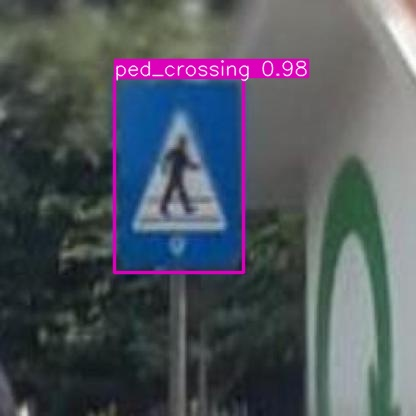

In [24]:
from IPython.display import Image as DisplayImage

DisplayImage(filename=f'/home/mohsin/School/Fall2024/Deployment/Final_Project/scripts/output/predicted_image.jpg', width=600)

### Purpose of the Bounding Box and Confidence Score:

    Bounding Box: Provides a visual cue as to where the model has identified the pedestrian crossing sign in the image. It helps in localizing the object within the broader scene, which is crucial for applications like autonomous driving, where understanding the exact location of road signs is necessary for safe navigation.
    
    Confidence Score: Helps in assessing the reliability of the prediction. Higher confidence scores generally suggest more accurate predictions, enabling users or downstream systems to make informed decisions based on the level of confidence.

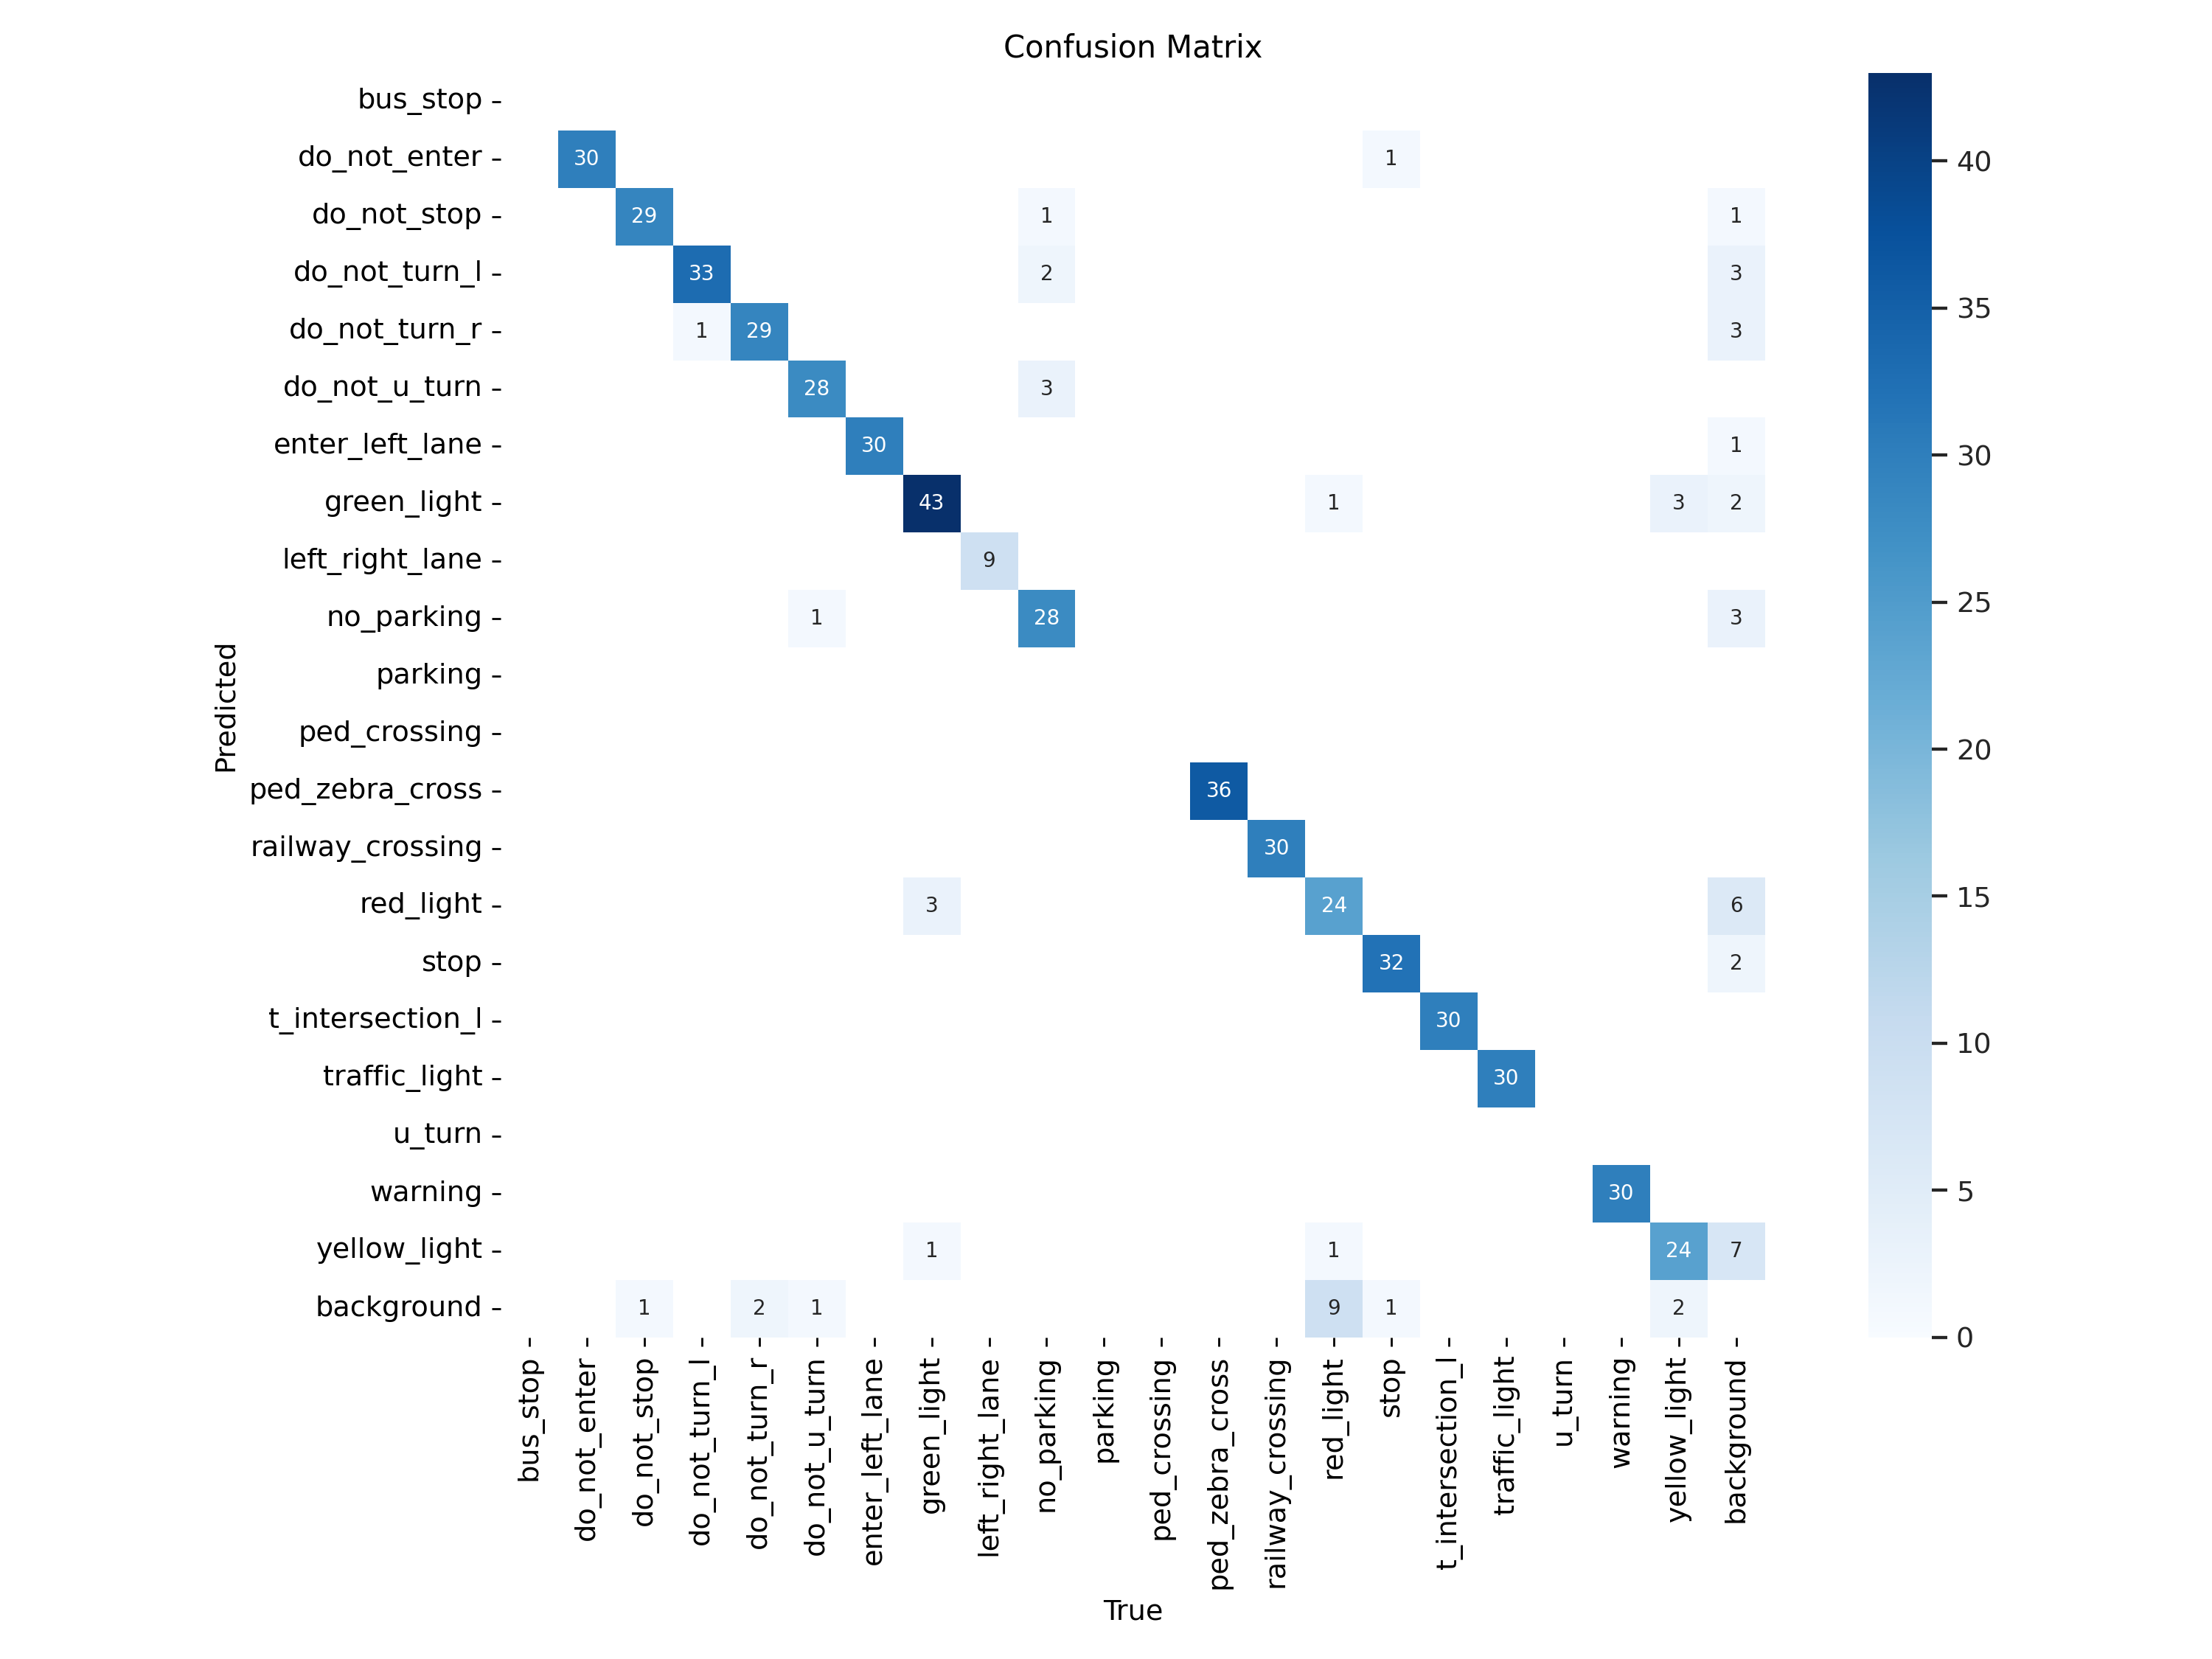

In [37]:
# /home/mohsin/School/Fall2024/Deployment/Final_Project/scripts/runs/detect/train3/confusion_matrix_normalized.png
DisplayImage(filename=f'/home/mohsin/School/Fall2024/Deployment/Final_Project/scripts/runs/detect/train3/confusion_matrix.png', width=800)

### Confusion Matrix Analysis

The diagonal elements represent the number of times predictions were correct (true positives). High values on the diagonal relative to other entries in the same row indicate good performance for specific classes.

    Specific Insights:

    High Accuracy for Some Classes: Classes like do_not_turn_l (33 correct predictions), green_light (43 correct predictions), and no_parking (36 correct predictions) show high numbers of correct predictions, indicating that the model performs well for these classes.
    
    Common Misclassifications:

        do_not_turn_r has been misclassified as do_not_turn_l 3 times. This might indicate visual similarities in the signs that the model is confusing.

        green_light is sometimes misclassified as traffic_light (3 instances), which is understandable given the physical similarity between these signs when only the green light is illuminated.

    Issues with Rare Classes: The class left_right_lane shows only 9 correct predictions with several misclassifications as other types of lane or direction indicators, suggesting the model struggles with this class.
    



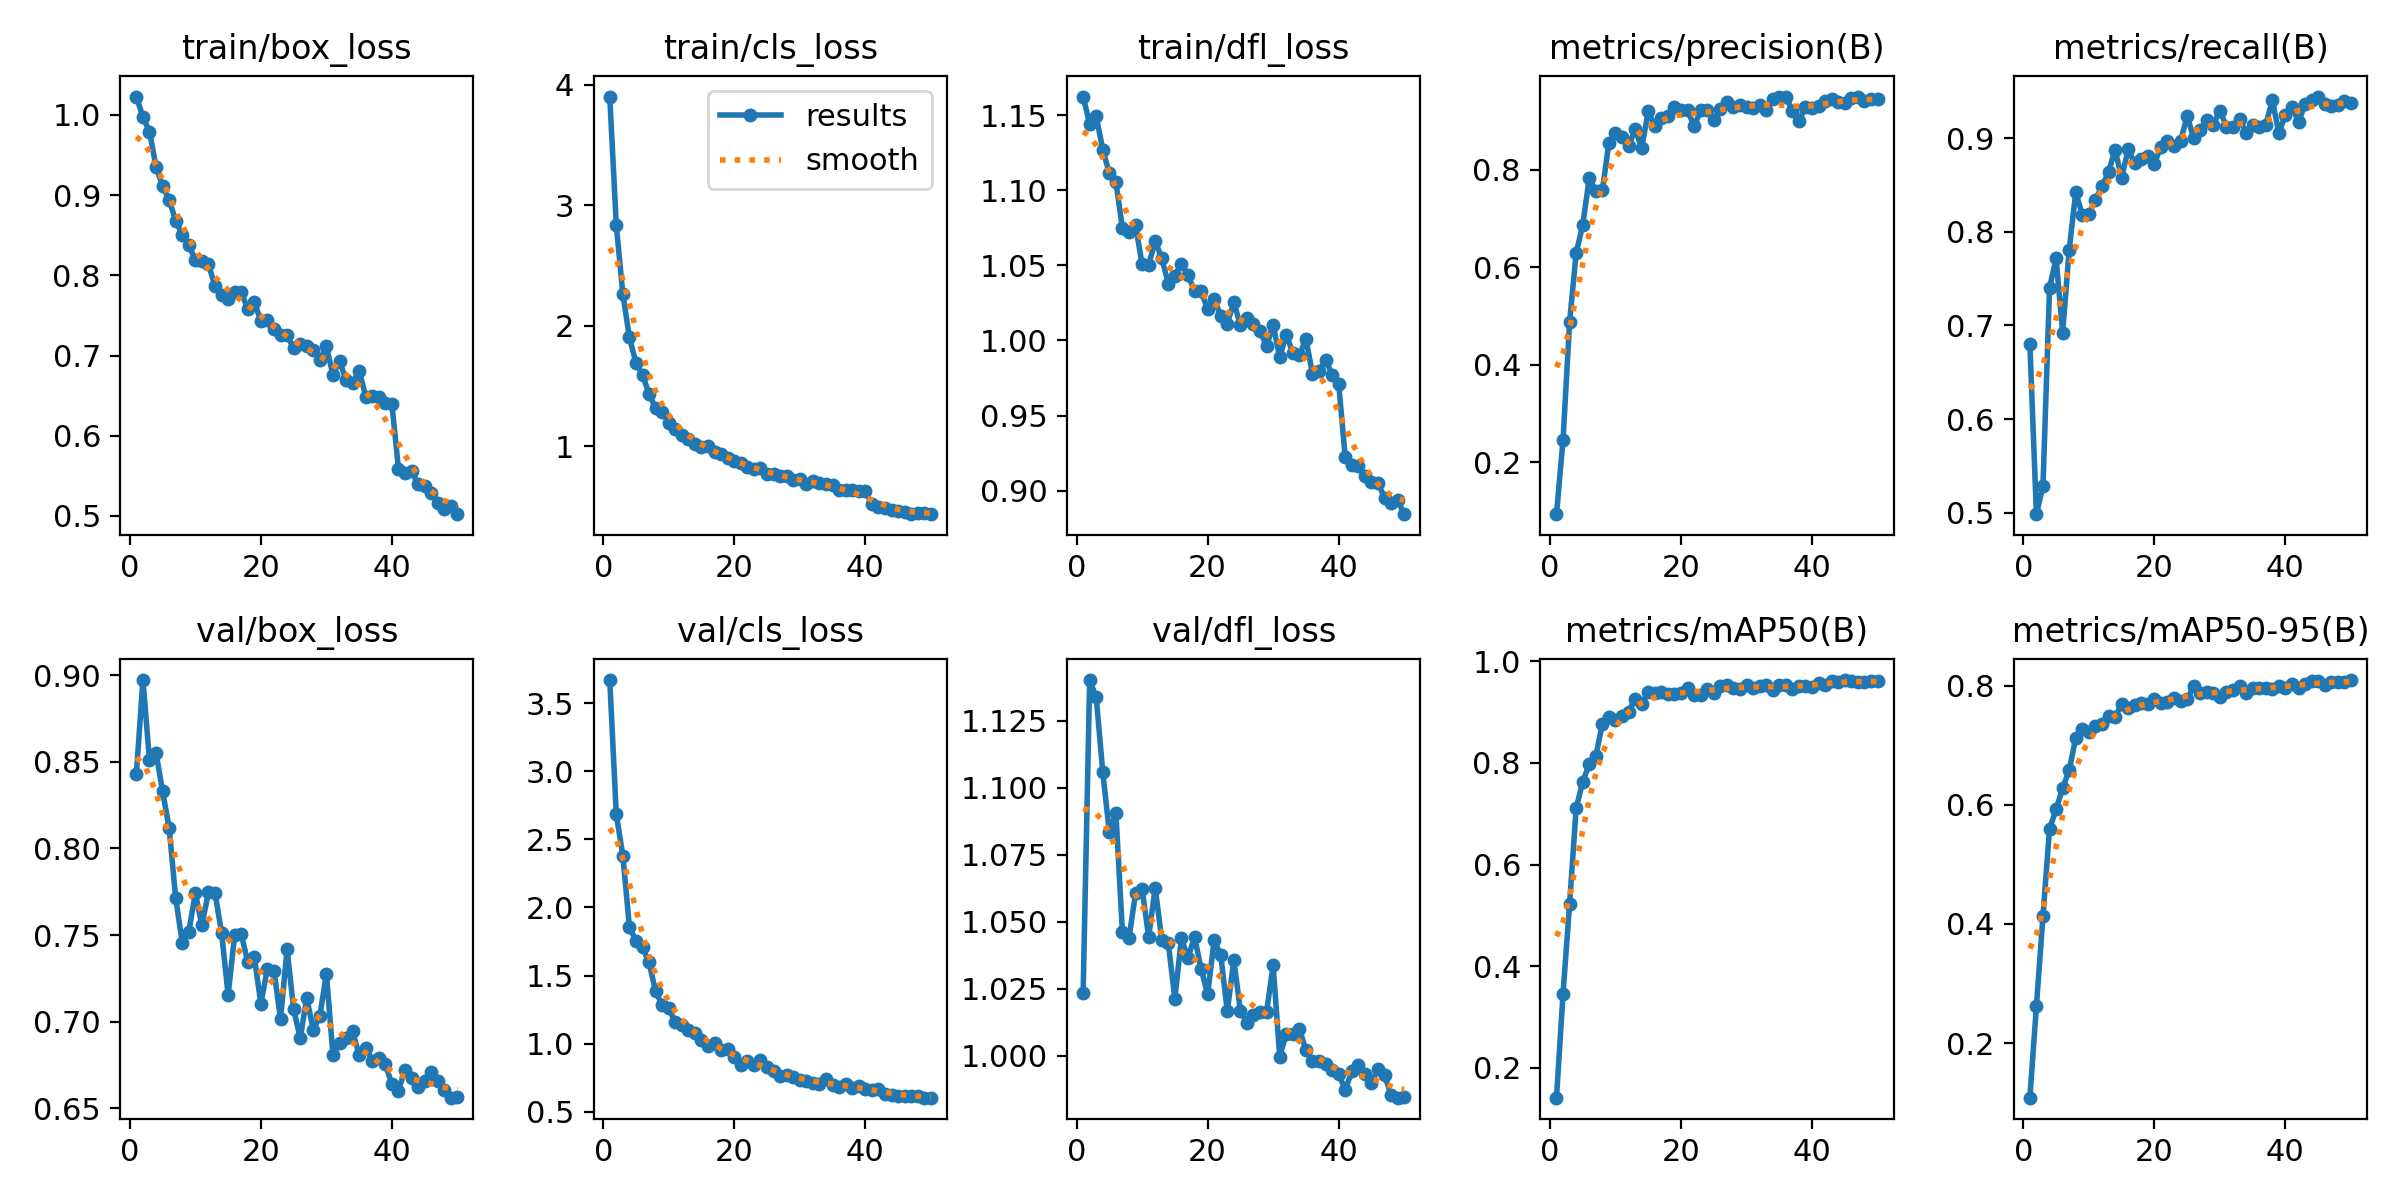

In [36]:
# /home/mohsin/School/Fall2024/Deployment/Final_Project/scripts/runs/detect/train3/results.png

DisplayImage(filename=f'/home/mohsin/School/Fall2024/Deployment/Final_Project/scripts/runs/detect/train3/results.png', width=800)

### Evaluation / Analysis

 The training loss across the box loss, class loss, and difference in localization loss (dfI_loss) demonstrates a consistent decrease, suggesting that the model is effectively learning to minimize errors across these aspects. 
 
 Similarly, the validation losses follow a decreasing trend but with some volatility, particularly evident in the initial epochs, which then stabilizes, indicating that the model generalizes well to unseen data over time.

    Performance metrics such as precision, recall, mean average precision at IoU threshold 50% (mAP50), and mean average precision calculated over multiple IoU thresholds from 50% to 95% (mAP50-95) also show improvement throughout the training epochs. Both precision and recall metrics exhibit a sharp increase early in training, maintaining high levels thereafter, which suggests that the model achieves a good balance between identifying relevant objects (recall) and ensuring the detected objects are indeed correct (precision). 
    
    The mAP metrics stabilize at high values, underscoring the model’s detection capabilities across varying degrees of overlap thresholds, reflecting both reliability and accuracy in the object detection tasks it was trained for.

### How to increase the frames per second for live inference?

    Model Conversion: Convert your best.pt model (likely from YOLO or a similar framework) to a TensorFlow Lite format. This involves first converting the model to a TensorFlow SavedModel and then to a TFLite model. You need to ensure the model is compatible with the TFLite inference engine, focusing on operations supported by TFLite.

    Leverage the Coral Accelerator: Deploy the TFLite model on the Raspberry Pi using the Coral USB Accelerator. The Coral device supports accelerated inference for models optimized for TensorFlow Lite, drastically increasing processing speed compared to running inference on the CPU alone

### How to increase the model performance?

    Exploring different datasets like BDD100K which has 1ook images will help as it is trained on both object detection and segmentation. The images can be used to extensive traiing , provided there are more GPU's available for parallel processing. If resources are limited, data augmentation can be used to add diversity to the existing dataset through random ratations etc.